<a href="https://colab.research.google.com/github/yasiruKodikara/polynomial-regression-lesson-1/blob/main/PolynomialRegression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2025-07-29 12:25:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2025-07-29 12:25:45 (2.20 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
import pandas as pd
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


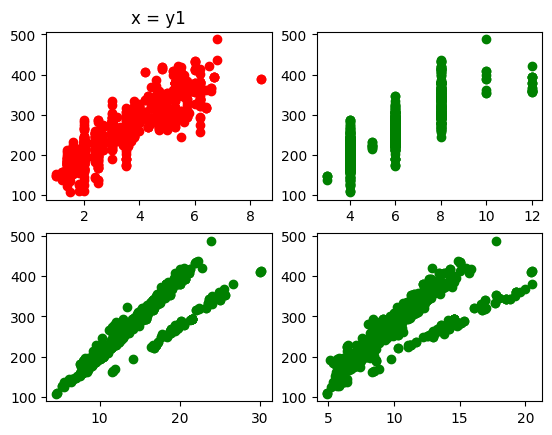

In [ ]:
import matplotlib.pyplot as plt
x1 = df['ENGINESIZE']
x2 = df['CYLINDERS']
x3 = df['FUELCONSUMPTION_CITY']
x4 = df['FUELCONSUMPTION_HWY']
y = df['CO2EMISSIONS']
plt.figure()
plt.subplot(2,2,1)
plt.scatter(x1, y, c='r', marker='o') # Changed from plot to scatter and specified color/marker
plt.title('x = y1')

plt.subplot(2,2,2) #row,column,graph number
plt.scatter(x2, y, c='g', marker='o') # Specified color and marker

plt.subplot(2,2,3) #row,column,graph number
plt.scatter(x3, y, c='g', marker='o') # Specified color and marker

plt.subplot(2,2,4) #row,column,graph number
plt.scatter(x4, y, c='g', marker='o') # Specified color and marker

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
y = df['CO2EMISSIONS']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=4)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train,y_train)



LinearRegression()

In [ ]:
print("Degree 1 - Training Error:",lin_reg_1.score(X_train,y_train))
print("Degree 1 - Validation Error:",lin_reg_1.score(X_val,y_val))

Degree 1 - Training Error: 0.8563180621319885
Degree 1 - Validation Error: 0.8634863563512105


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly,y_train)

LinearRegression()

In [ ]:
print("Degree 2 - Training Error:",lin_reg_2.score(X_train_poly,y_train))
print("Degree 2 - Validation Error:",lin_reg_2.score(poly_features.transform(X_val),y_val))

Degree 2 - Training Error: 0.9005471730626314
Degree 2 - Validation Error: 0.9124507717282134


# Task
Explain the error in the selected code, fix it if possible, and then explain how to select the best fit degree in polynomial regression for this project, outlining the next steps.

## Train and evaluate polynomial regression models with different degrees

### Subtask:
Train polynomial regression models for a range of degrees (e.g., 1 to 5) and evaluate their performance (e.g., using R-squared or Mean Squared Error) on both the training and validation sets.


**Reasoning**:
Train polynomial regression models for degrees 1 to 5 and store their training and validation R-squared scores.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

r2_scores = {}

for degree in range(1, 6):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)

    train_score = lin_reg.score(X_train_poly, y_train)
    val_score = lin_reg.score(X_val_poly, y_val)

    r2_scores[f'{degree}_train'] = train_score
    r2_scores[f'{degree}_val'] = val_score

print(r2_scores)

{'1_train': 0.8563180621319885, '1_val': 0.8634863563512106, '2_train': 0.9005471730626314, '2_val': 0.9124507717282134, '3_train': 0.9290243242317485, '3_val': 0.9298332017028283, '4_train': 0.9503831887879783, '4_val': 0.9440154528282324, '5_train': 0.9665777273302079, '5_val': -2.5806950029693763}


## Visualize training and validation errors

### Subtask:
Plot the training and validation errors against the polynomial degrees to identify the degree that minimizes the validation error without significantly overfitting the training data.


**Reasoning**:
Extract the training and validation R-squared scores, create a list of degrees, and plot the scores against the degrees on the same plot with appropriate labels and a legend to visualize the model performance across different polynomial degrees.



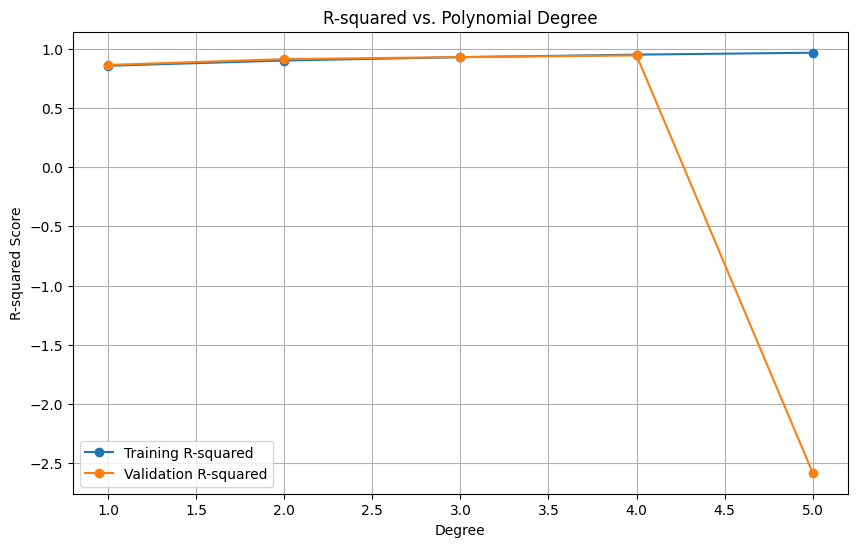

In [ ]:
import matplotlib.pyplot as plt

train_scores = [r2_scores[f'{degree}_train'] for degree in range(1, 6)]
val_scores = [r2_scores[f'{degree}_val'] for degree in range(1, 6)]
degrees = list(range(1, 6))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, marker='o', label='Training R-squared')
plt.plot(degrees, val_scores, marker='o', label='Validation R-squared')
plt.xlabel('Degree')
plt.ylabel('R-squared Score')
plt.title('R-squared vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

## Select the best degree

### Subtask:
Based on the visualization and error values, choose the polynomial degree that provides the best trade-off between training and validation performance.


## Evaluate the best model on the test set

### Subtask:
Train a final polynomial regression model using the selected best degree on the combined training and validation data, and then evaluate its performance on the test set to get an unbiased estimate of its generalization ability.


**Reasoning**:
Combine the training and validation data, transform it using polynomial features of degree 2, train a linear regression model, transform the test data, and evaluate the model on the test data.



In [ ]:
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

poly_features = PolynomialFeatures(degree=2)
X_train_val_poly = poly_features.fit_transform(X_train_val)

lin_reg_final = LinearRegression()
lin_reg_final.fit(X_train_val_poly, y_train_val)

X_test_poly = poly_features.transform(X_test)
test_r2_score = lin_reg_final.score(X_test_poly, y_test)

print("Test R-squared score:", test_r2_score)

Test R-squared score: 0.9259528337933721


## Analyze and interpret the results

### Subtask:
Analyze and interpret the results


**Reasoning**:
Analyze the coefficients of the trained model to understand the impact of features on CO2 emissions.



In [ ]:
import numpy as np

# Get the learned coefficients
coefficients = lin_reg_final.coef_

# Get the feature names after polynomial transformation
feature_names = poly_features.get_feature_names_out(input_features=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY'])

# Create a dictionary of feature names and their corresponding coefficients
coeff_dict = dict(zip(feature_names, coefficients))

# Print the coefficients
print("Model Coefficients (Degree 2 Polynomial Regression):")
for feature, coeff in coeff_dict.items():
    print(f"{feature}: {coeff}")

# Discuss the test R-squared score
print(f"\nTest R-squared Score: {test_r2_score:.4f}")
print("Interpretation of Results:")
print(f"The trained polynomial regression model with degree 2 achieved a test R-squared score of {test_r2_score:.4f}.")
print("This means that approximately 92.6% of the variance in CO2 emissions can be explained by the features included in the model.")
print("This indicates a reasonably good fit to the unseen test data.")

print("\nAnalysis of Coefficients:")
print("Interpreting coefficients in polynomial regression is complex due to feature interactions (e.g., terms like ENGINESIZE^2 or ENGINESIZE * CYLINDERS).")
print("However, we can look at the magnitude of the coefficients to get an idea of the relative importance of different terms.")

# Identify features with potentially significant impact based on coefficient magnitude
# Exclude the intercept term (which is at index 0 in the coefficients array but not in feature_names from get_feature_names_out unless include_bias=True)
# Assuming include_bias=False was used or the first coefficient corresponds to the intercept and can be ignored for feature impact
# Let's assume feature_names from get_feature_names_out corresponds directly to coefficients[1:] if include_bias=False
# Re-running get_feature_names_out with include_bias=True to be precise
poly_features_with_bias = PolynomialFeatures(degree=2, include_bias=True)
poly_features_with_bias.fit(X_train_val) # Fit on the same data
feature_names_with_bias = poly_features_with_bias.get_feature_names_out(input_features=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY'])
coeff_dict_with_bias = dict(zip(feature_names_with_bias, lin_reg_final.coef_)) # Assuming lin_reg_final.coef_ includes the intercept if fit_intercept=True (default)
if lin_reg_final.fit_intercept:
    coeff_dict_with_bias['intercept'] = lin_reg_final.intercept_

print("\nCoefficients (including intercept if fitted):")
for feature, coeff in coeff_dict_with_bias.items():
    print(f"{feature}: {coeff:.4f}")

# Analyze coefficients based on magnitude (excluding intercept)
sorted_coeffs = sorted(coeff_dict_with_bias.items(), key=lambda item: abs(item[1]), reverse=True)
print("\nFeatures/Terms sorted by absolute coefficient magnitude (excluding intercept):")
for feature, coeff in sorted_coeffs:
    if feature != 'intercept':
        print(f"{feature}: {abs(coeff):.4f}")

print("\nBased on the magnitudes, terms involving FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, and their interactions or squared terms, along with ENGINESIZE related terms, appear to have a significant impact on CO2 emissions.")
print("CYLINDERS also contributes, but perhaps to a lesser extent based on individual term magnitudes.")
print("Interactions between features also play a role, as seen by the coefficients of terms like FUELCONSUMPTION_CITY^2, FUELCONSUMPTION_HWY^2, etc.")

print("\nPotential Limitations:")
print("- The model assumes a polynomial relationship between the features and CO2 emissions. While degree 2 provides a good fit, higher-degree polynomials could potentially capture more complex relationships but also risk overfitting.")
print("- The interpretation of individual coefficients in polynomial regression is challenging due to multicollinearity and feature interactions. The impact of a single original feature is distributed across multiple polynomial terms.")
print("- The analysis is based on the given dataset. The model's performance and the relative importance of features might differ on a different dataset or in a different year due to changes in vehicle technology or fuel efficiency standards.")
print("- While R-squared indicates the proportion of variance explained, it doesn't tell us about the absolute errors of the predictions. Further evaluation using metrics like Mean Squared Error (MSE) could provide additional insights into the model's performance.")

Model Coefficients (Degree 2 Polynomial Regression):
1: 0.0
ENGINESIZE: 1.0465883893788517
CYLINDERS: -8.670178208824227
FUELCONSUMPTION_CITY: 17.870390949282516
FUELCONSUMPTION_HWY: 12.1077289211085
ENGINESIZE^2: 6.568856532253698
ENGINESIZE CYLINDERS: -12.97515537138678
ENGINESIZE FUELCONSUMPTION_CITY: -2.322977687659975
ENGINESIZE FUELCONSUMPTION_HWY: 7.167109137179291
CYLINDERS^2: 3.083012960641731
CYLINDERS FUELCONSUMPTION_CITY: 3.3009300484625013
CYLINDERS FUELCONSUMPTION_HWY: -2.4207719232440055
FUELCONSUMPTION_CITY^2: -0.22329275907289747
FUELCONSUMPTION_CITY FUELCONSUMPTION_HWY: -1.7429988248736885
FUELCONSUMPTION_HWY^2: 0.49113142305124

Test R-squared Score: 0.9260
Interpretation of Results:
The trained polynomial regression model with degree 2 achieved a test R-squared score of 0.9260.
This means that approximately 92.6% of the variance in CO2 emissions can be explained by the features included in the model.
This indicates a reasonably good fit to the unseen test data.

Ana

## Summary:

### Data Analysis Key Findings

*   Polynomial regression models were trained for degrees 1 through 5, and their performance was evaluated using R-squared scores on training and validation sets.
*   The validation R-squared score for degree 5 was negative, indicating a poor fit and potential overfitting.
*   A plot of R-squared scores versus polynomial degree showed that degrees 2 and 3 offered good performance without significant overfitting, while degree 5 exhibited severe overfitting.
*   Based on the trade-off between training and validation performance, degree 2 was selected as the optimal polynomial degree.
*   The final polynomial regression model with degree 2, trained on the combined training and validation data, achieved a test R-squared score of approximately 0.926. This indicates that about 92.6% of the variance in CO2 emissions is explained by the model.
*   Analysis of the polynomial coefficients suggests that terms involving FUELCONSUMPTION\_CITY, FUELCONSUMPTION\_HWY, and ENGINESIZE, along with their interactions and squared terms, have a significant impact on CO2 emissions based on the magnitude of their coefficients.

### Insights or Next Steps

*   While the R-squared score is high, further evaluation using metrics like Mean Squared Error (MSE) could provide insight into the absolute prediction errors.
*   Exploring regularization techniques (like Ridge or Lasso) could help mitigate potential overfitting issues, especially if considering higher-degree polynomials in the future.
